## Задача 1

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

## 1.1. Скачать данные по ссылке 
https://gbcdn.mrgcdn.ru/uploads/asset/5329635/attachment/ec62e059045694b6065f1490d4f57730.csv

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import mpl_toolkits.mplot3d

df = pd.read_csv('kc_house_data.csv', sep = (','))
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


## 1.2 Изучите стоимости недвижимости

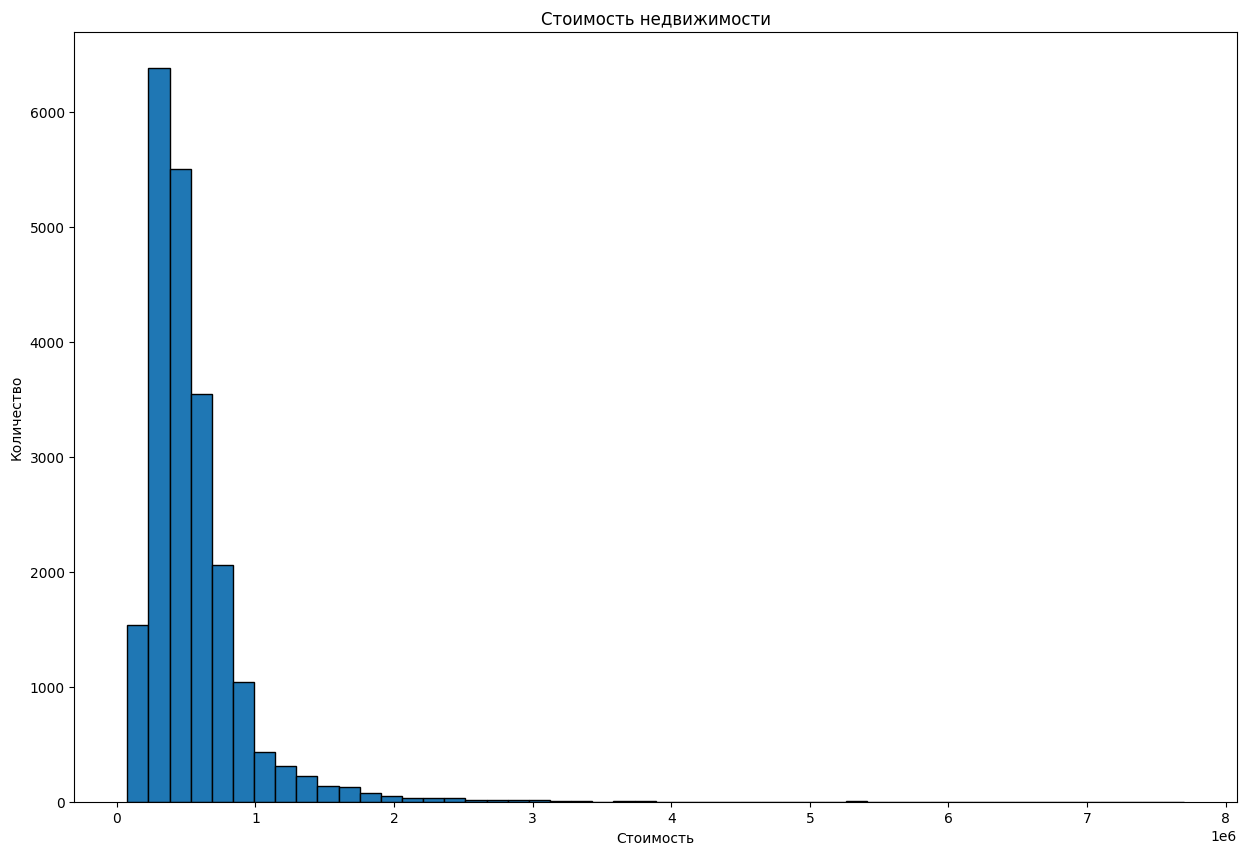

In [46]:
plt.figure(figsize = (15,10))
plt.hist(df['price'], bins = (50), edgecolor='black')
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');


#### Вывод:
На графике видно, что большое количество домов находится в самой низкой ценовой категории, а количество дорогих домов очень маленькое.

### 1.3 Изучите распределение квадратуры жилой

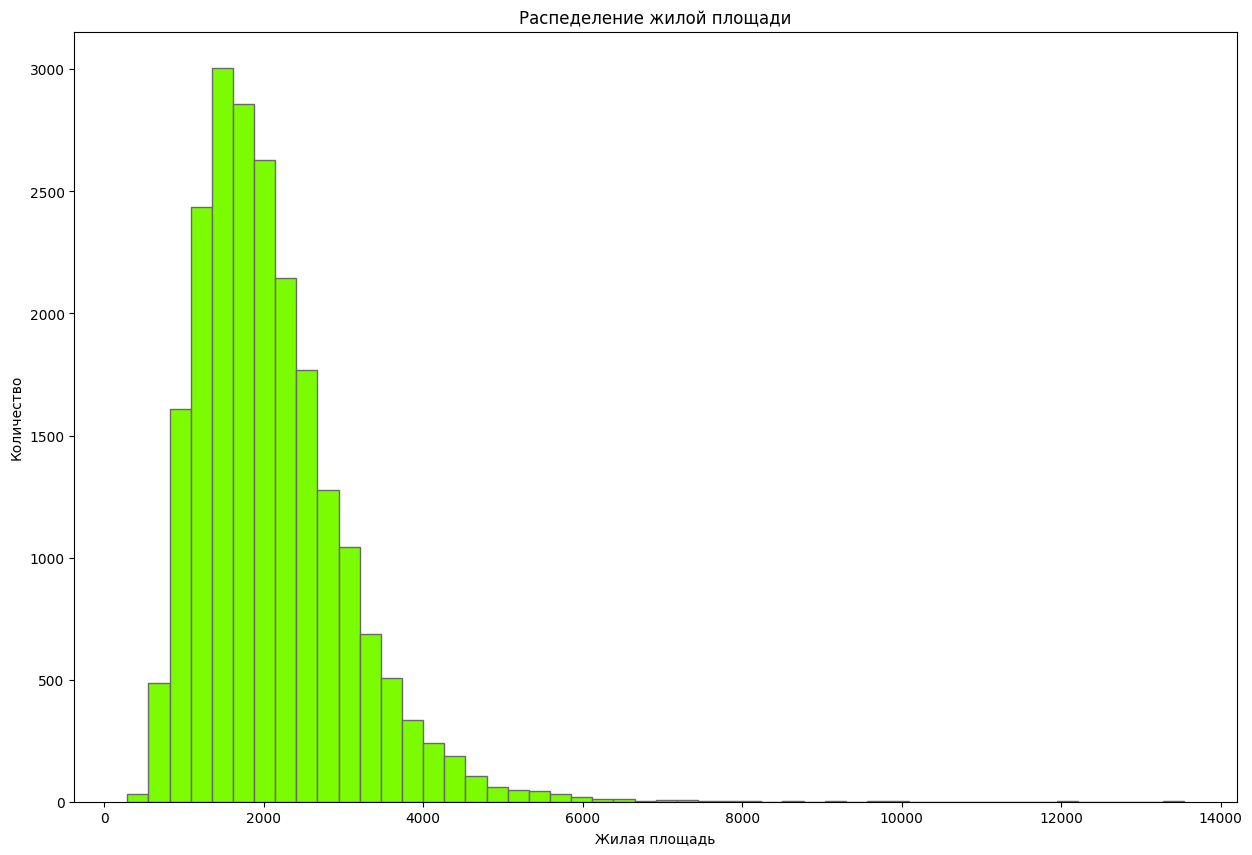

In [47]:
plt.figure(figsize = (15,10))
plt.hist(df['sqft_living'], bins = (50), edgecolor='#696969', color='#7CFC00')
plt.title('Распеделение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

#### Вывод:
На графике (Распеделение жилой площади) видно, что колиство домов с маленькой площадью среднее, а самое большое количество домов со средней площадь, дальше видим, что количество домов очень сильно снижается по мере увеличения площади дома.

### 1.4 Изучите распределение года постройки

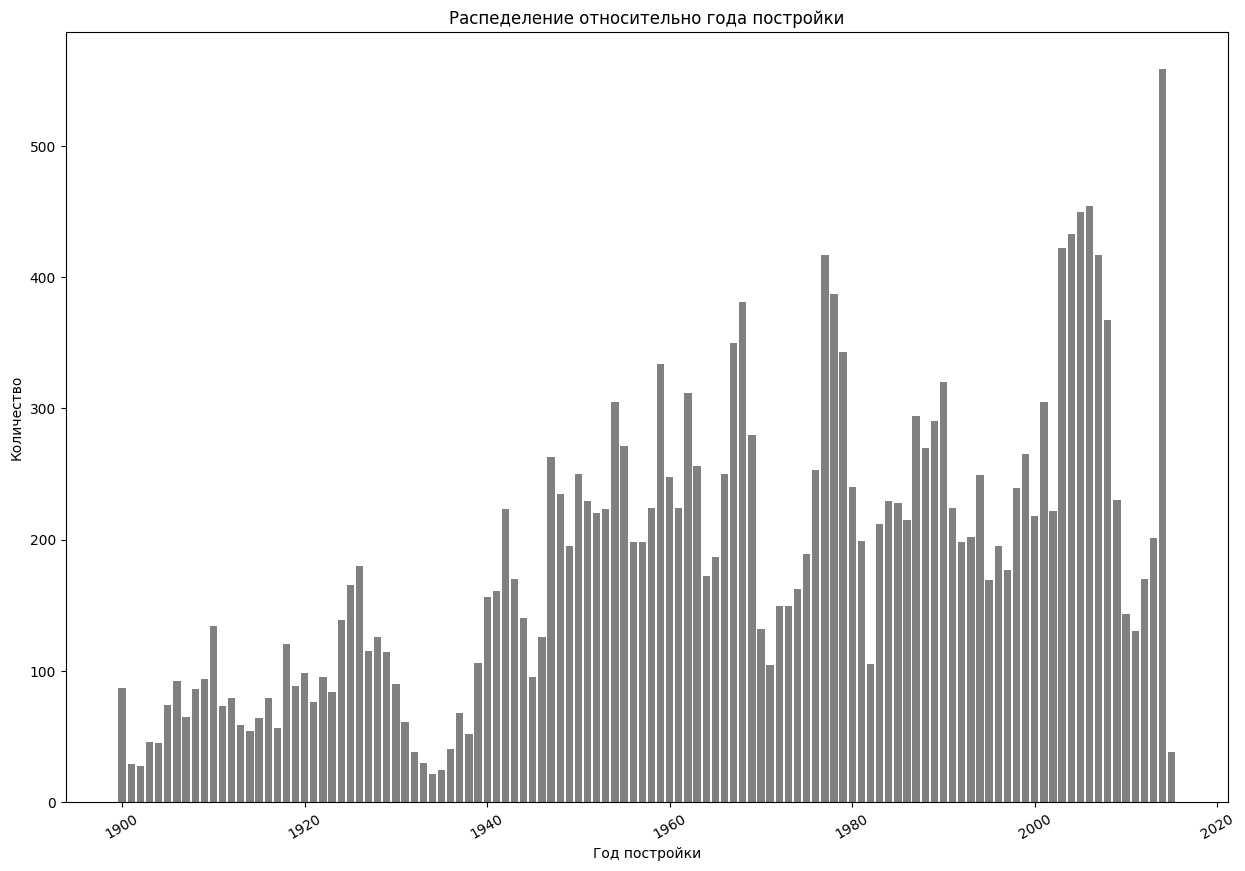

In [48]:
plt.figure(figsize = (15,10))
plt.title('Распеделение относительно года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');
data0 = df['yr_built'].value_counts()
names = data0.index
values = data0.values
plt.bar(names, values, color='#808080')
plt.xticks(rotation = 30);

#### Вывод:
На графике (Распеделение относительно года постройки) видно что количество домов почти равномерно увеличивается по мере времени, но в некоторые года были сильные просадки.

## Задача 
- Постройте график
- Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную


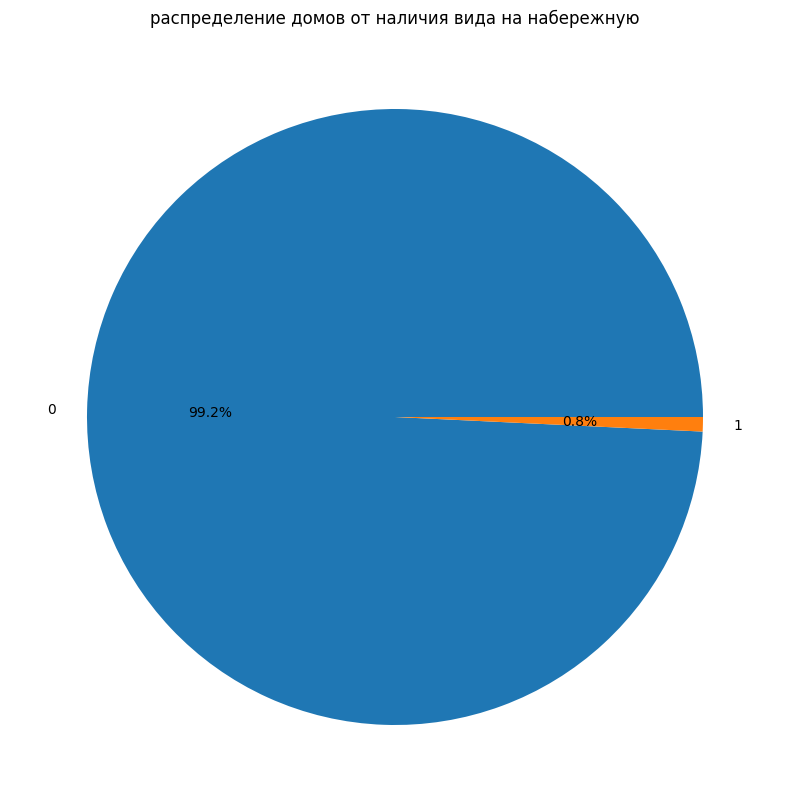

In [49]:
data1 = df['waterfront'].value_counts()

plt.figure(figsize = (15,10))
plt.title('распределение домов от наличия вида на набережную')
#names1 = ['No', 'Yes'] # Можно заменить числовые обозначения на да и нет
names1 = data1.index
values = data1.values

plt.pie(values, labels=names1, autopct='%.1f%%');


#### Вывод:
На круговом графике (Распределение домов от наличия вида на набережную) видно, что меньше одного процента домов имеют вид на набережную.

### 2.2 Изучите распределение этажей домов

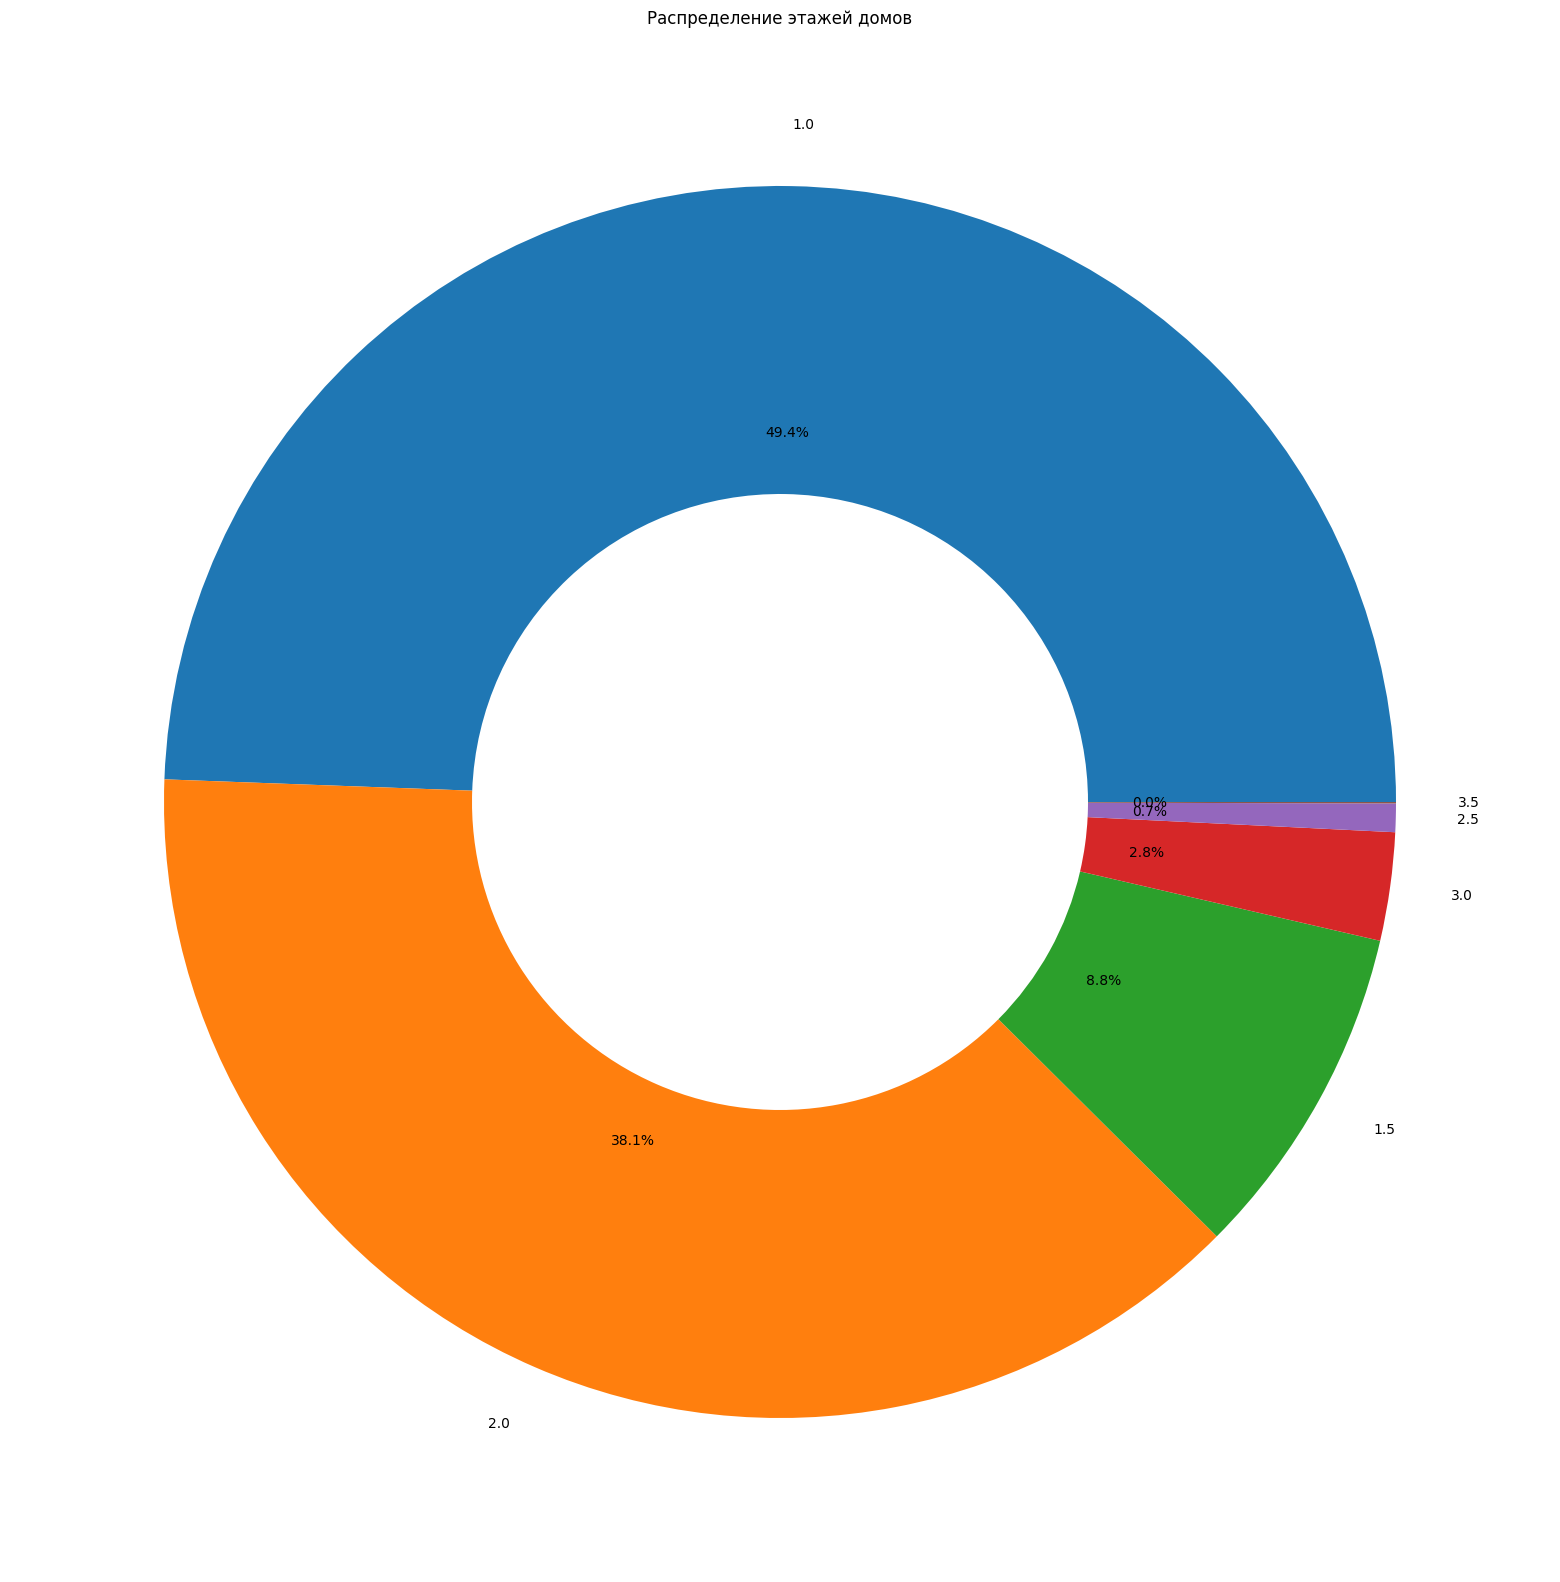

In [50]:
data2 = df['floors'].value_counts()

plt.figure(figsize=(20, 20))
plt.title('Распределение этажей домов')
names1 = data2.index
values = data2.values

plt.pie(values, labels=names1, autopct='%.1f%%', wedgeprops=dict(width=0.5));

#### Вывод:
На круговом графике (Распределение этажей домов) видно, половину от количества всех домов занимают одноэтажные дома, двух этажные дома занимают 40 %, а количество трёх этажных домов и выше составляет всего 10 %.

### 2.2 Изучите распределение состояния домов

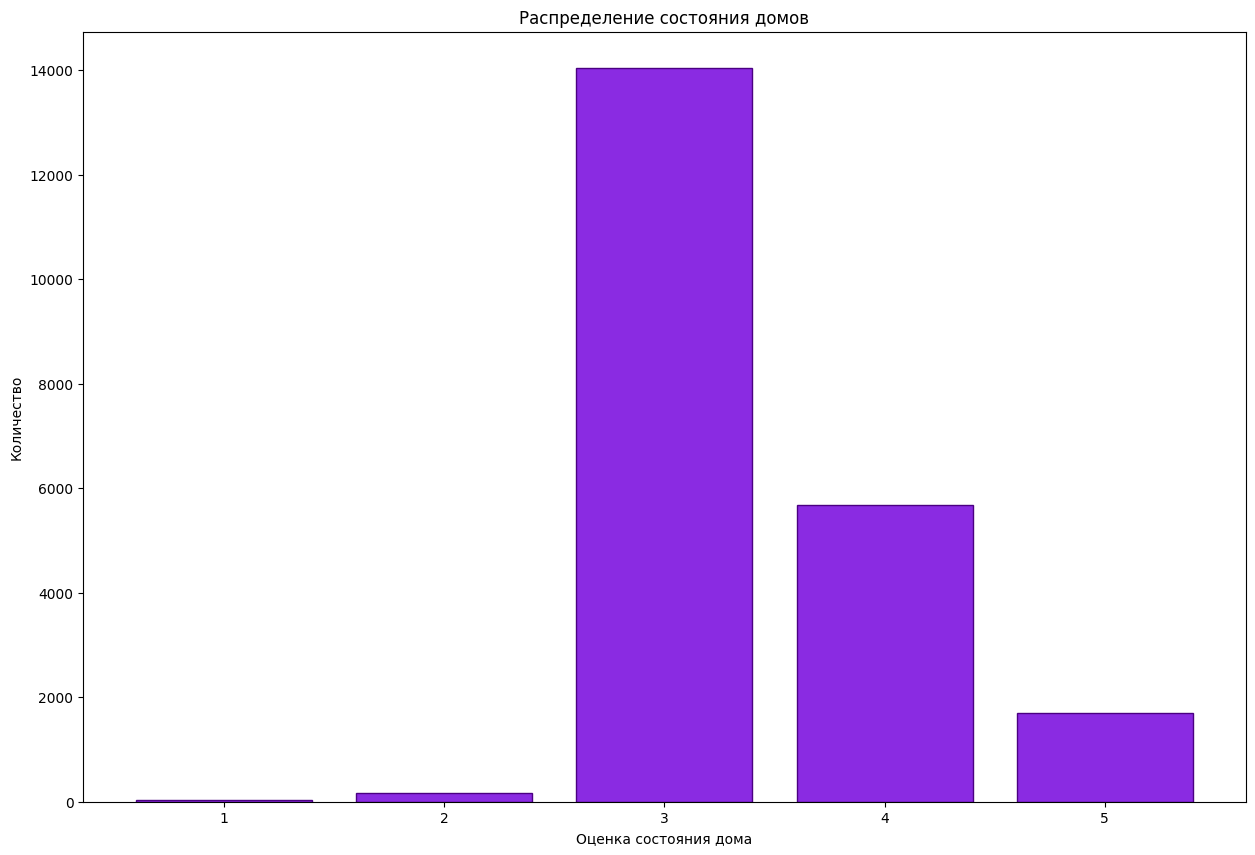

In [51]:
plt.figure(figsize = (15,10))
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество');
data0 = df['condition'].value_counts()
names = data0.index
values = data0.values
plt.bar(names, values, edgecolor = '#4B0082', color='#8A2BE2');

#### Вывод:
На графике (Распределение состояния домов) видно, что домов в плохом состоянии практически нет, самое большое количество домов в среднем состоянии, примерно половина от них в хорошем состоянии и небольшая часть в отличном.

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

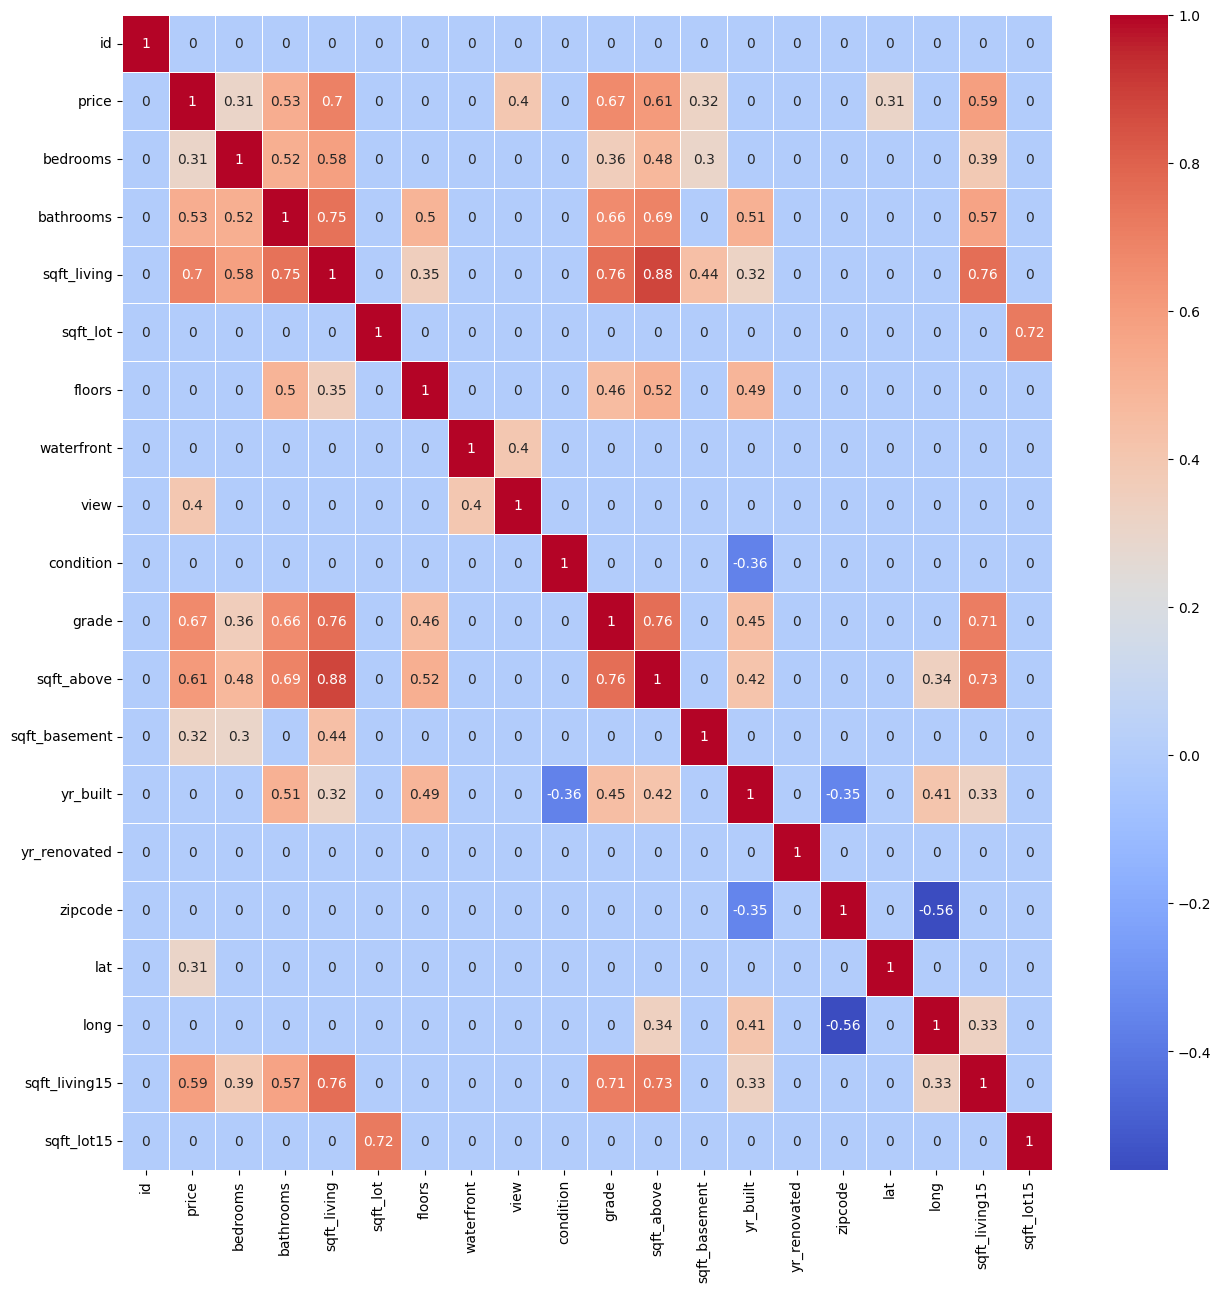

In [52]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

На данной тепловой карте видно несколько сильных зависимостей цены от жилой площади это одна самых сильных зависимостей, следующая идёт зависимость от оценки дома, количество ванных комнат, наличие хорошего вида. Дальше расмотрим эти зависимости подробнее

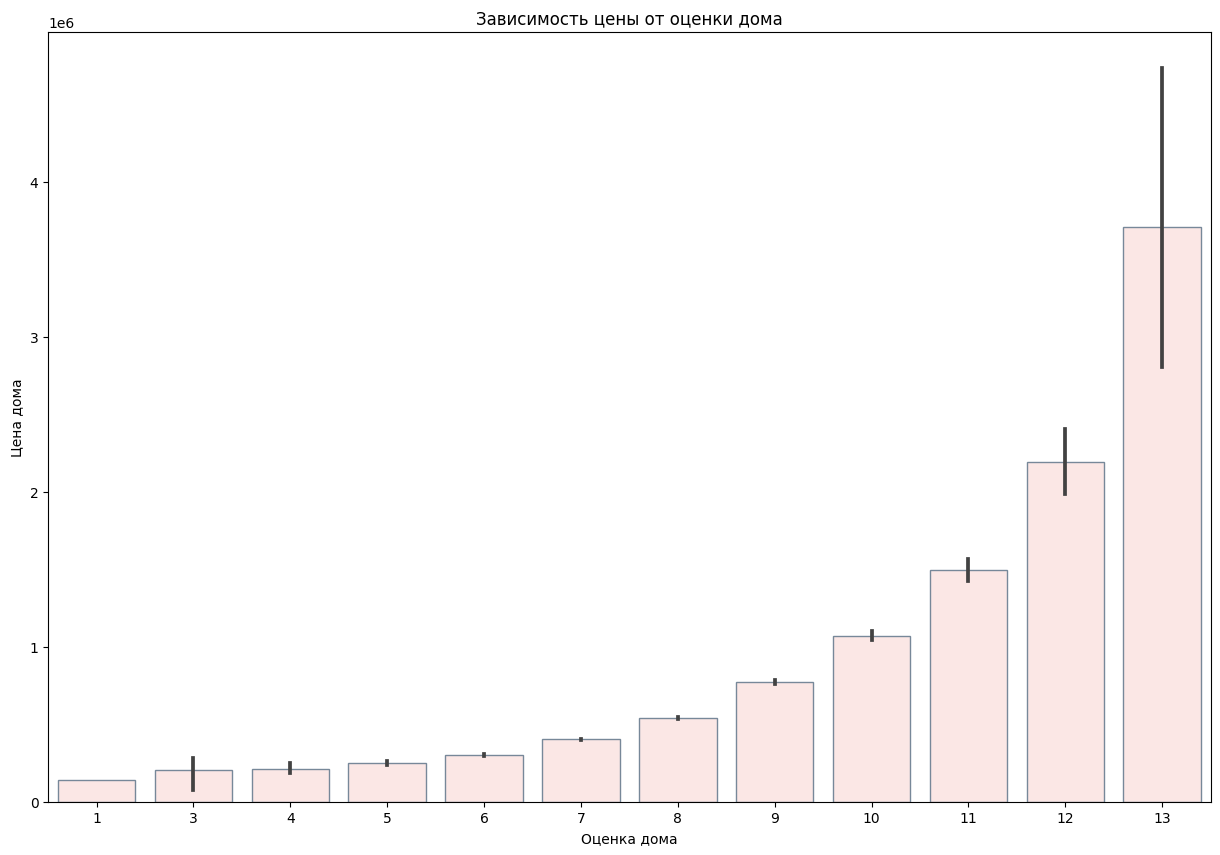

In [53]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['grade'], y=df['price'], edgecolor='#778899', color = '#FFE4E1');
plt.xlabel('Оценка дома')
plt.ylabel('Цена дома')
plt.title('Зависимость цены от оценки дома');

#### Вывод:

На графике (Зависимость цены от оценки дома) видно, что стоимость дома напрямую зависит и растёт от его оценки.

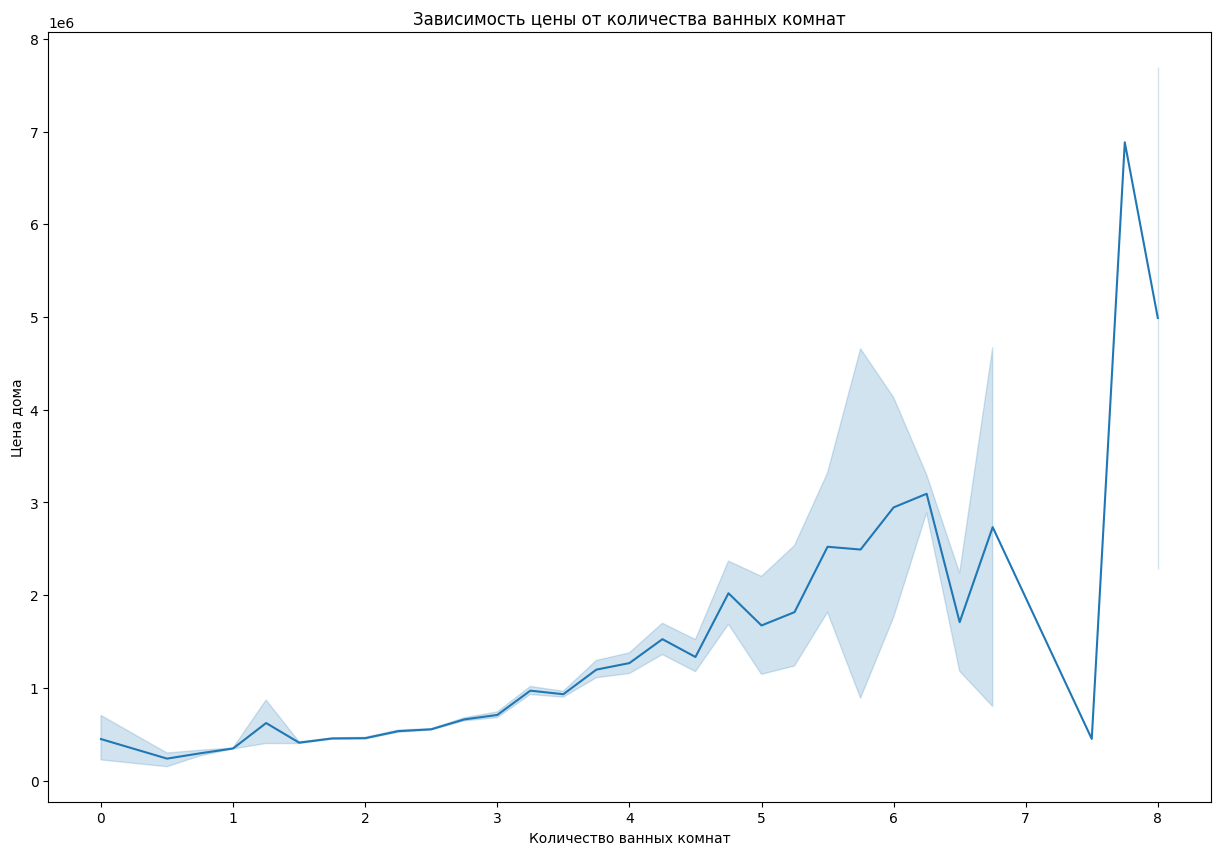

In [54]:
plt.figure(figsize = (15,10))
sns.lineplot(x=df['bathrooms'], y=df['price']);
plt.xlabel('Количество ванных комнат')
plt.ylabel('Цена дома')
plt.title('Зависимость цены от количества ванных комнат');

#### Вывод:

На графике (Зависимость цены от количества ванных комнат) видно что цена домов растёт с увеличеним количества ванных комнат. Но есть одна странная просадка цены на отметке примерно 7.5 по шкале (Количества ванных комнат).


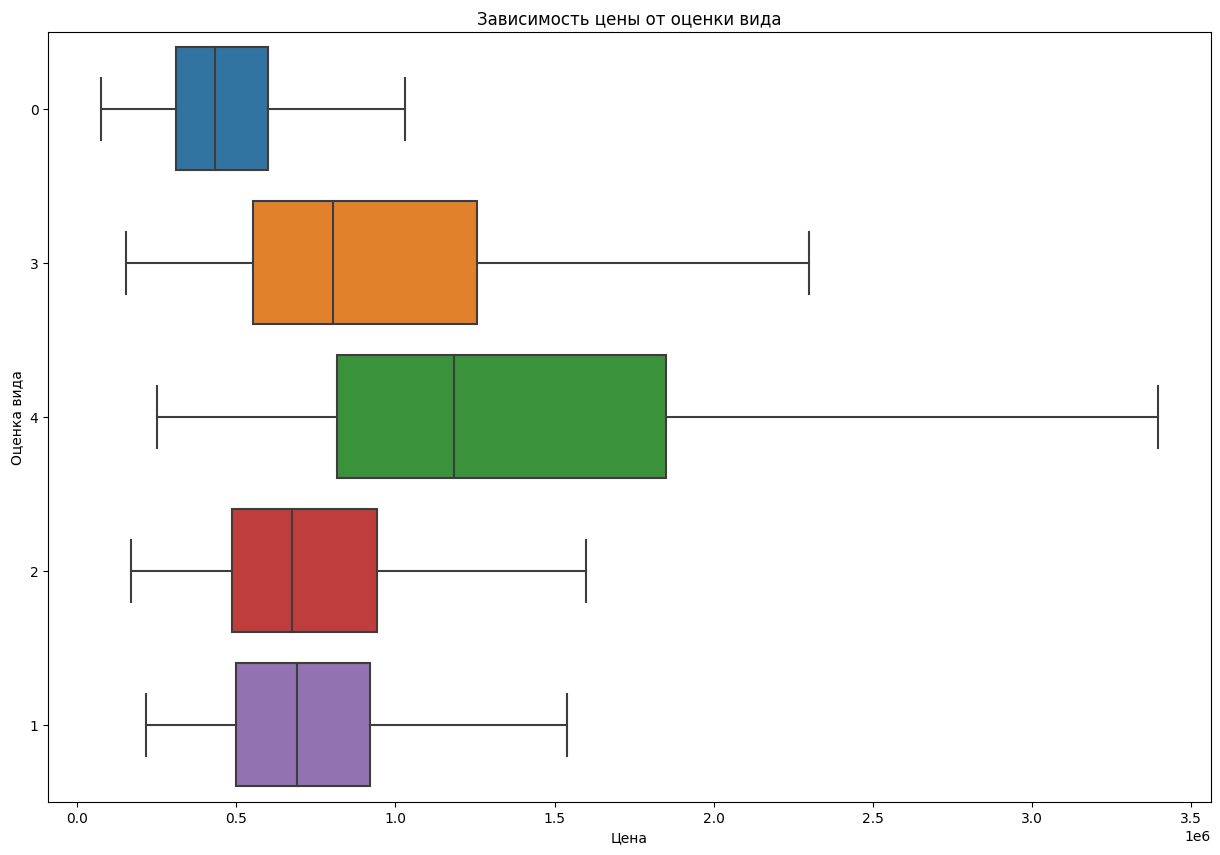

In [55]:
plt.figure(figsize = (15,10))
sns.boxplot(x=df['price'], y=df['view'].astype('str'),showfliers=False);
plt.xlabel('Цена')
plt.ylabel('Оценка вида')
plt.title('Зависимость цены от оценки вида');

#### Вывод:

На графике (Зависимость цены от оценки вида) видно, что цена напрямую зависит от оценки вида дома. Чем выша оценка тем выше стоимость дома. 

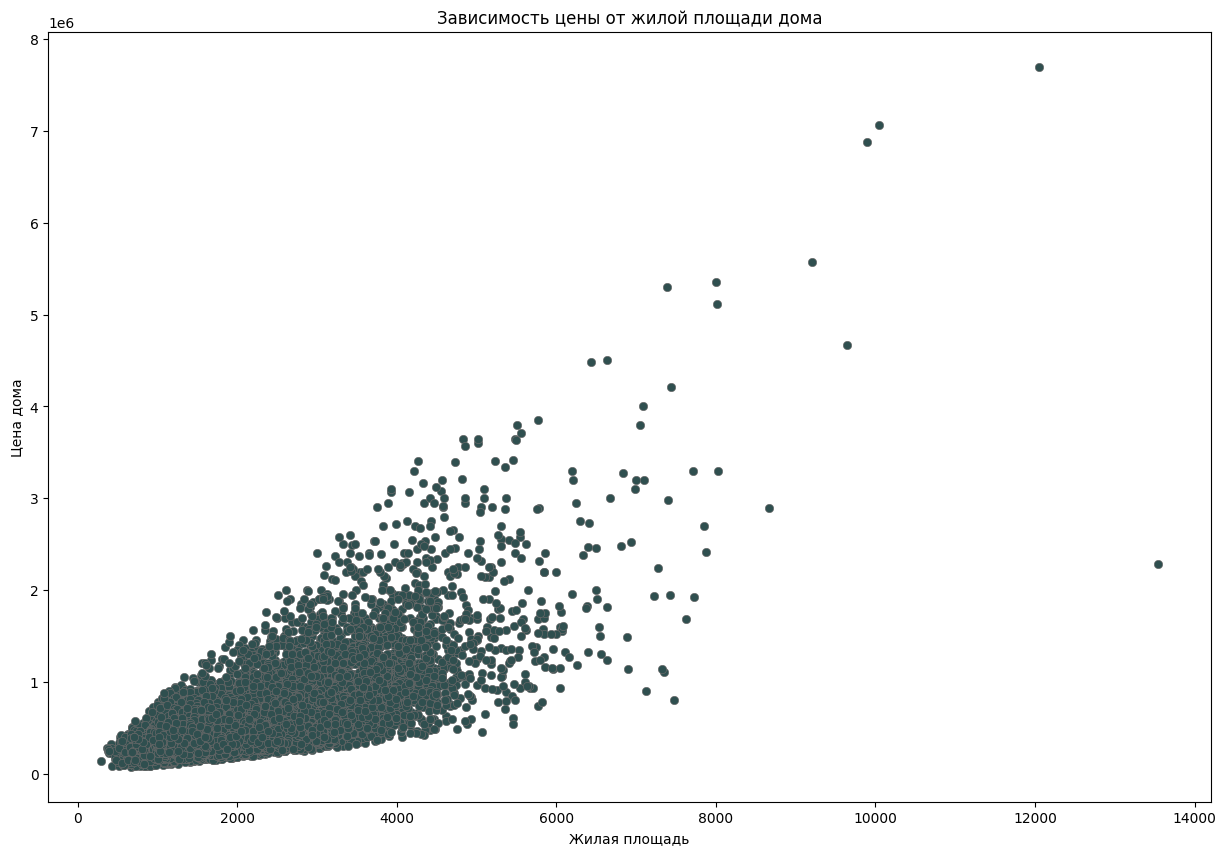

In [56]:
plt.figure(figsize = (15,10))
sns.scatterplot(x=df['sqft_living'], y=df['price'], edgecolor='#696969', color = '#2F4F4F');
plt.xlabel('Жилая площадь')
plt.ylabel('Цена дома')
plt.title('Зависимость цены от жилой площади дома');

#### Вывод:

На графике (Зависимость цены от жилой площади дома) видно, что её размер напрямую влияет на стоимость дома. Но основаная масса домов с небольшой площадью и стоимостью.

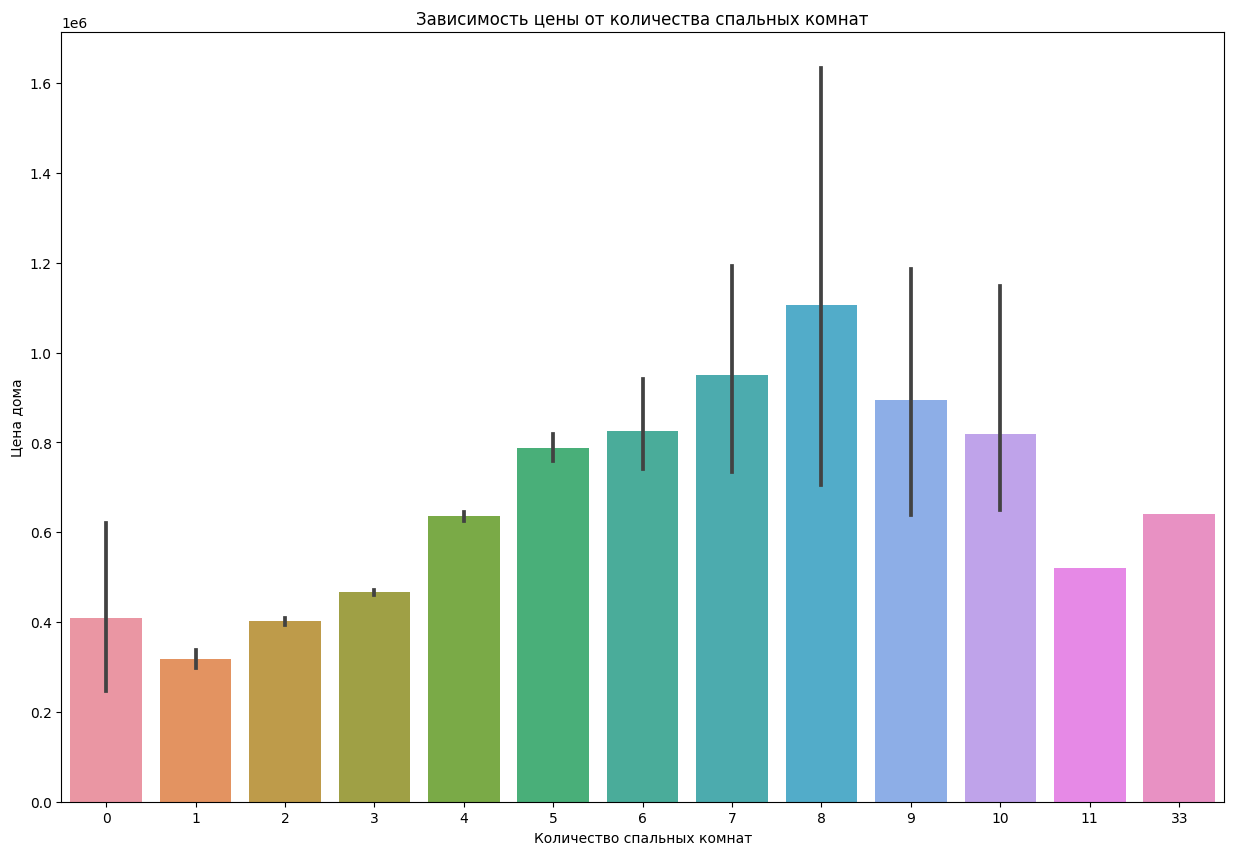

In [57]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['bedrooms'], y=df['price']);
plt.xlabel('Количество спальных комнат')
plt.ylabel('Цена дома')
plt.title('Зависимость цены от количества спальных комнат');

#### Вывод:

На графике (Зависимость цены от количества спальных комнат) видно, что цена начинает расти с увеличением количества спальных комнат, но это происходит до 8 комнат, дальше цена дома начинает падад с увеличеним количества комнат. Рост и падение цены происходят равномерно.

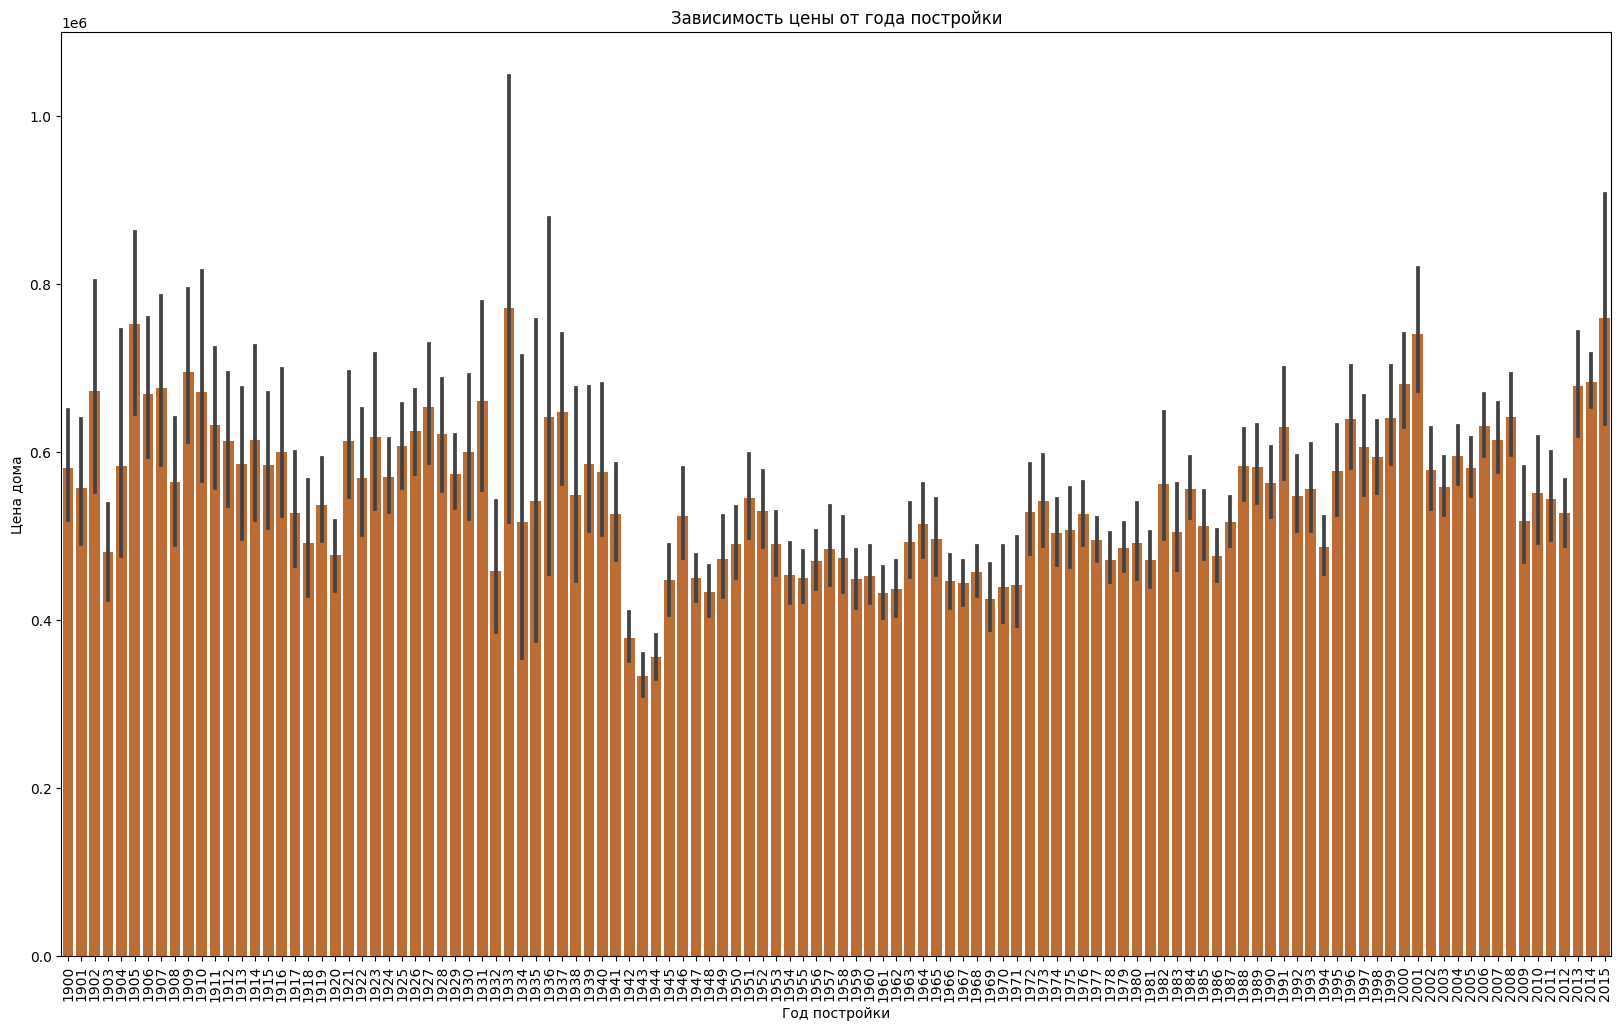

In [58]:
plt.figure(figsize = (20,12))
sns.barplot(x=df['yr_built'], y=df['price'], color = '#D2691E');
plt.xlabel('Год постройки')
plt.ylabel('Цена дома')
plt.title('Зависимость цены от года постройки');
plt.xticks(rotation=90);

#### Вывод:
На графике (Зависимость цены от года постройки) видим, что год постройки практически не влияет на цену домов. Как и было видно на тепловой карте.